In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import join,Table,Column,vstack

# Read two catalogues and form a joint one matched by TARGETID
cat2='BGS_Y1.fits' #smaller ztol and  bright limits 10.0
cat1='/pscratch/sd/s/smcole/JoseCut2.fits'

#dat1=Table.read(cat1)
#dat1.info('stats')

dat2=Table.read(cat2)
print('Length of table1:',len(dat1),' length of table 2:',len(dat2))
dat = join(dat2, dat1, keys='TARGETID')
print('Length of matched table:',len(dat))


Length of table1: 771683  length of table 2: 4118915
Length of matched table: 660827


In [3]:
rmag=22.5-2.5*np.log10(np.clip(dat1['FLUX_R'],1.0e-10,None))


In [4]:
dat.info('stats')

/global/common/software/desi/perlmutter/desiconda/20240425-2.2.0/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1746: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr, where=where)
/global/common/software/desi/perlmutter/desiconda/20240425-2.2.0/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1746: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr, where=where)
/global/common/software/desi/perlmutter/desiconda/20240425-2.2.0/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1746: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr, where=where)
/global/common/software/desi/perlmutter/desiconda/20240425-2.2.0/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1746: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr, where=where)


<Table length=660827>
         name             mean         std         min          max     n_bad
--------------------- ------------ ----------- ------------ ----------- -----
             TARGETID -9.24383e+12 3.96388e+16  3.96273e+16 3.96373e+16     0
                  Z_1     0.123123   0.0649534   0.00200252    0.599587     0
                NTILE      1.88827    0.891936            1           4     0
                TILES           --          --           --          --     0
                   RA      190.979     85.6286  0.000108207     359.999     0
                  DEC      19.2642     22.8562     -19.4074     79.2392     0
         flux_g_dered      101.314     213.897      3.17465     9795.15     0
         flux_r_dered       212.68     423.556      17.7858     15512.8     0
         flux_z_dered      367.116     718.681            0     28272.6     0
        flux_w1_dered      304.177     511.735     -5154.15     21766.7     0
        flux_w2_dered      200.711     328

/global/common/software/desi/perlmutter/desiconda/20240425-2.2.0/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)


: mean difference: 0.0022534644 rms difference: 0.013692443


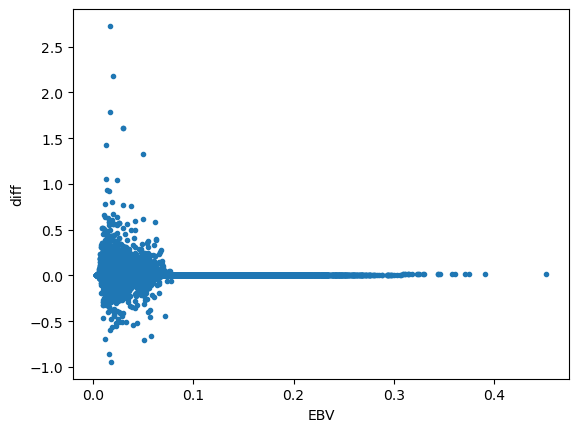

/tmp/ipykernel_2026134/1454881127.py:9: RuntimeWarning: divide by zero encountered in log10
  diff = dat['gmag']-22.5+2.5*np.log10(dat['FLUX_G'])+3.2*dat['EBV_2']


: mean difference: -inf rms difference: nan


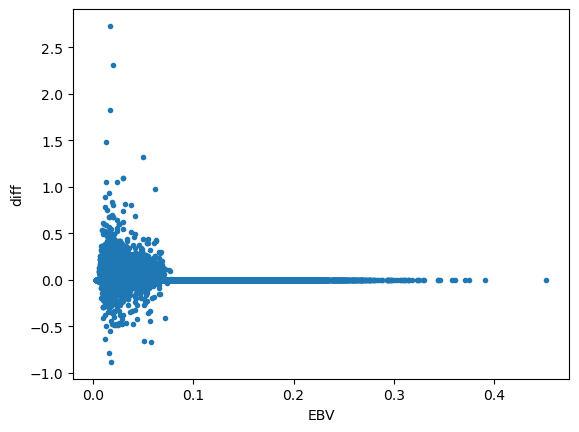

In [18]:
# compare magnitudes
diff = dat['rmag']-22.5+2.5*np.log10(dat['FLUX_R'])+2.2*dat['EBV_2']
print(': mean difference:',np.mean(diff),'rms difference:',np.std(diff)) 
plt.scatter(dat['EBV_2'],diff,marker='.')
plt.ylabel('diff')
plt.xlabel('EBV')
plt.show()

diff = dat['gmag']-22.5+2.5*np.log10(dat['FLUX_G'])+3.2*dat['EBV_2']
print(': mean difference:',np.mean(diff),'rms difference:',np.std(diff)) 
plt.scatter(dat['EBV_2'],diff,marker='.')
plt.ylabel('diff')
plt.xlabel('EBV')
plt.show()

In [7]:
mask = (rmag>10) & (rmag<18.0)
dat=dat1[mask]
dat.write('/pscratch/sd/s/smcole/JoseCut2.fits',overwrite=True) 

Z : mean difference: 7.064084289364524e-05 rms difference: 0.009953233937803669
Z : mean fractional difference: 9.607487731251857e-05 rms fractional difference: 0.014775801034095112
Z : mean ratio: 1.0000924168420027 rms ratio: 0.08479263068083878
plotting column  Z_2  against  Z_1


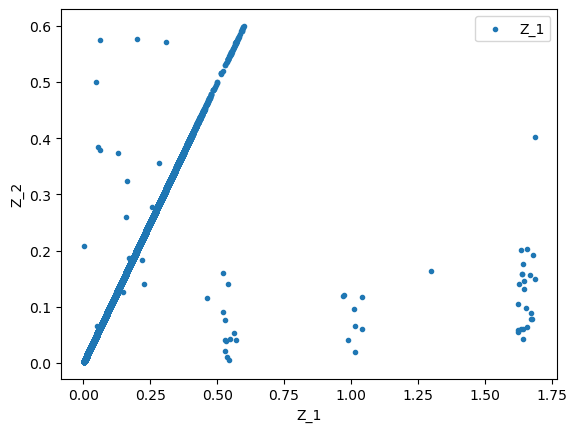

KeyError: 'REST_GMR_0P2'

In [3]:

# Plot the properties of objects from the 2nd catalogue against the same property for matched objects in the 1st catalogue
# unless they are identical (skips columns that aren't floats or integers)
col2='dummy' #dummy string set as placeholder for 2nd column headings
eps=1.0e-20 #prevent divide by zero
for col1 in (dat.colnames): #loop over all column headings
    if (col1[-1]=='1'):     #but all those that are not headings from the first catalogue   
       col2=col1[:-1]+'2'   #create the corresponding column heading for the second catalogue
       #print(col1,' has data type:',dat[col2].dtype)
       if ( (dat[col2].dtype=='>f8') | (dat[col2].dtype=='>f4') | (dat[col2].dtype=='>i8')| (dat[col2].dtype=='>i4') ): #checks data type is a number
           diff=dat[col2]-dat[col1]
           fdiff=2.0*(dat[col2]-dat[col1])/(np.abs(dat[col2]+dat[col1])+eps) #fractional difference = difference/average
           ratio=dat[col1]/dat[col2]
           print(col1[:-2],': mean difference:',np.mean(diff),'rms difference:',np.std(diff)) 
           print(col1[:-2],': mean fractional difference:',np.mean(fdiff),'rms fractional difference:',np.std(fdiff)) 
           print(col1[:-2],': mean ratio:',np.mean(ratio),'rms ratio:',np.std(ratio)) 
           if (np.std(diff)>0): # only bother making a plot if the values are not identical
              print('plotting column ',col2,' against ',col1)  
              plt.scatter(dat[col2],dat[col1], marker='.',label=col1)
              plt.ylabel(col2)
              plt.xlabel(col1)
              plt.legend()
              plt.show()
       else:
           print('skipping column based on data type:',dat[col2].dtype)


In [ ]:
dat1.info('stats')

In [ ]:
import catalogue_analysis as ca

# plot the V/Vmax distribution for the selected sample
def plot_v_vmax(dat,regions):
    bin_edges = np.linspace(0.0, 1.0, 50)
    dbin=bin_edges[1]-bin_edges[0]
    
    
    for reg in regions:
        Sel=ca.selection(reg) # define selection parameters for this region
        regmask=(dat['reg']==reg)#mask to select objects in specified region    
        mask = (regmask) & (dat['Z'] > Sel['zmin']) & (dat['Z'] < Sel['zmax']) & (dat['rmag'] > Sel['bright']) & (dat['rmag'] < Sel['faint']) #sample selection
        plt.hist(dat['v'][mask]/dat['vmax'][mask], bins=bin_edges, histtype='step', density=True, weights=dat[mask]['WEIGHT'],  label='Weighted '+reg)
        plt.hist(dat['v'][mask]/dat['vmax'][mask], bins=bin_edges, histtype='step', density=True, label=reg )
    plt.xlabel('$V/V_{max}$')
    plt.ylabel('$P(V/V_{max})$')
    plt.plot([0.0,1.0],[1.0,1.0],color='black')
    plt.xlim([0,1.0])
    plt.ylim([0.8,1.2])
    plt.legend()
    plt.show()

In [ ]:
#Compare the two V/Vmax distribution for the two input catalogues
regions = ('N', 'S')
plot_v_vmax(dat1,regions)
plot_v_vmax(dat2,regions)

In [ ]:
bin_edges = np.linspace(0.0, 1.0, 50)
dbin=bin_edges[1]-bin_edges[0]
    
    
for reg in regions:
    Sel=ca.selection(reg) # define selection parameters for this region
    regmask=(dat['reg_1']==reg)#mask to select objects in specified region    
    mask = (regmask) & (dat['Z_1'] > Sel['zmin']) & (dat['Z_1'] < Sel['zmax']) & (dat['rmag_1'] > Sel['bright']) & (dat['rmag_1'] < Sel['faint']) #sample selection
    plt.hist(dat['v_1'][mask]/dat['vmax_1'][mask], bins=bin_edges, histtype='step', density=True, weights=dat[mask]['WEIGHT_1'],  label='Weighted '+reg)
    plt.hist(dat['v_1'][mask]/dat['vmax_1'][mask], bins=bin_edges, histtype='step', density=True, label=reg )
plt.xlabel('$V/V_{max}$')
plt.ylabel('$P(V/V_{max})$')
plt.plot([0.0,1.0],[1.0,1.0],color='black')
plt.xlim([0,1.0])
plt.ylim([0.8,1.2])
plt.legend()
plt.show()